# Credit risk evaluation model with textual features from loan descriptions for P2P lending


## Data loading

In [9]:
import pandas as pd

raw_data = pd.read_csv('data/accepted_2007_to_2018q4.csv')
print(raw_data.columns.tolist())
raw_data.describe()

C:\Users\Jonah\AppData\Local\Temp\ipykernel_14904\1763151520.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('data/accepted_2007_to_2018q4.csv')


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Data preprocessing

In [19]:
selected_columns = [
    'issue_d',
    # target variable
    'loan_status',
    # loan characteristics
    'loan_amnt',
    'term',
    'int_rate',
    'purpose',
    # creditworthiness features
    'fico_range_low',
    'grade',
    'inq_last_6mths',
    'revol_util', # TODO should be percentage
    'delinq_2yrs',
    'pub_rec',
    'open_acc',
    'revolving_income_ratio',  # this needs to be checked. This is just a balance and not "The ratio of revolving line to monthly income" - Paper
    'total_acc',
    'credit_age',  # this is a date. "The number of months from the time at which the borrower opened his or her first credit card to the loan requests" - Paper
    # Solvency features
    'annual_inc',
    'emp_length',
    'home_ownership',
    'verification_status',
    'dti',
    # Description
    'desc',
]


filtered_data = raw_data.copy()
filtered_data['issue_d'] = pd.to_datetime(filtered_data['issue_d'], format='%b-%Y')
filtered_data = filtered_data[filtered_data['issue_d'] <= '2014-12-31']

filtered_data['earliest_cr_line'] = pd.to_datetime(filtered_data['earliest_cr_line'], format='%b-%Y')
filtered_data["credit_age"] = (filtered_data["issue_d"] - filtered_data["earliest_cr_line"]).dt.days / 30

filtered_data['revolving_income_ratio'] = filtered_data['total_rev_hi_lim'] / (filtered_data['annual_inc'] / 12)
filtered_data = filtered_data.query("desc.str.len() >= 20")

filtered_data = filtered_data[selected_columns]
filtered_data = filtered_data.dropna()
filtered_data.to_parquet('data/filtered_data.parquet')
filtered_data.describe()


,issue_d,loan_amnt,int_rate,fico_range_low,inq_last_6mths,revol_util,delinq_2yrs,pub_rec,open_acc,total_rev_hi_lim_per_monthly_income,total_acc,credit_age,annual_inc,dti
count,75751,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,7.575100e+04,75751.000000
mean,2013-06-13 06:35:29.746142208,15067.831118,13.941740,696.243680,0.819105,58.151462,0.264115,0.133516,11.329817,5.352822,25.529696,194.036903,7.553684e+04,17.302494
min,2012-08-01 00:00:00,1000.000000,6.000000,660.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.026526,2.000000,36.533333,8.400000e+03,0.000000
25%,2013-02-01 00:00:00,9000.000000,10.990000,675.000000,0.000000,42.300000,0.000000,0.000000,8.000000,2.747324,17.000000,137.966667,4.800000e+04,11.630000
50%,2013-07-01 00:00:00,14000.000000,13.670000,690.000000,0.000000,59.900000,0.000000,0.000000,11.000000,4.427184,24.000000,177.600000,6.500000e+04,16.980000
75%,2013-11-01 00:00:00,20000.000000,16.780000,710.000000,1.000000,75.900000,0.000000,0.000000,14.000000,6.800000,32.000000,236.433333,9.000000e+04,22.760000
max,2014-11-01 00:00:00,35000.000000,26.060000,845.000000,7.000000,120.200000,22.000000,17.000000,62.000000,78.433735,105.000000,760.900000,7.141778e+06,34.990000
std,NaN,8029.844603,4.378926,29.916977,1.050112,22.647010,0.743134,0.432532,4.711659,4.004387,11.187241,84.216248,5.412655e+04,7.536755


## Data exploration

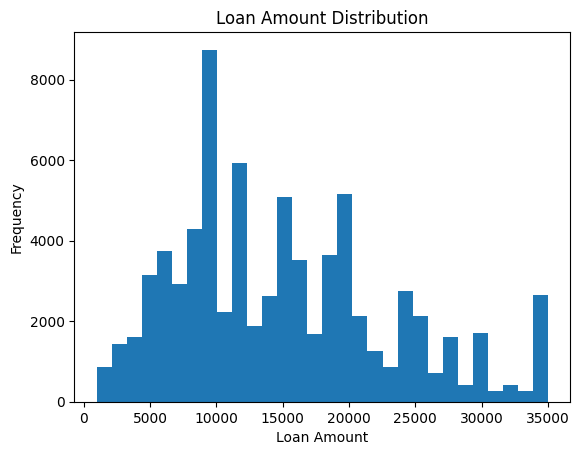

In [20]:
import matplotlib.pyplot as plt
filtered_data = pd.read_parquet('data/filtered_data.parquet')


plt.hist(filtered_data['loan_amnt'], bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

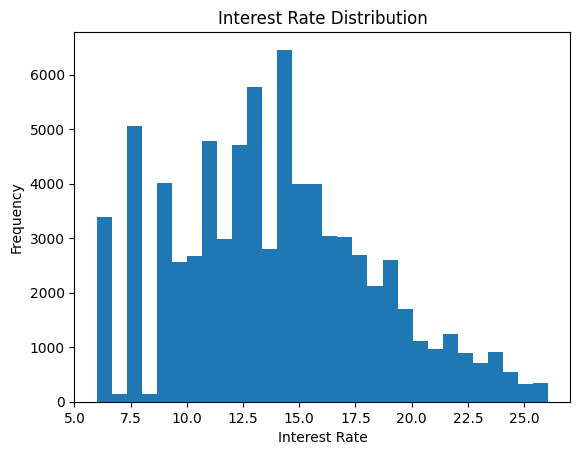

In [21]:
plt.hist(filtered_data['int_rate'], bins=30)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

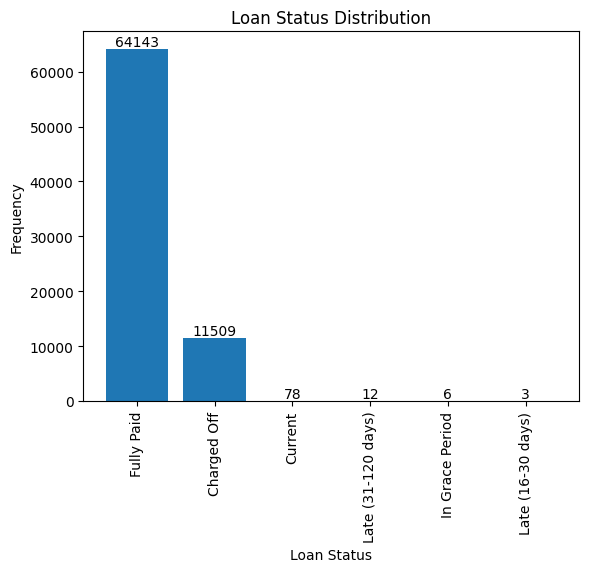

In [22]:
loan_status_values = filtered_data['loan_status'].unique()

loan_status_counts = filtered_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Loan Status Distribution')
for i, count in enumerate(loan_status_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()